# Topics Covered :
* 1 - Eigen Value
* 2 - Eigen Vector
* 3 - PCA (Principal Component Analysis)
* 4 - LDA (Linear Discriminant analysis)

# Import Libraries :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
np.set_printoptions(suppress=True) # Avoid the number in exponent form
from sklearn.metrics.pairwise import euclidean_distances

# Read Data

In [3]:
data = pd.read_excel("pca data.xlsx")
data.head()

,AccelSec,TopSpeed_KmH,Range_Km
0,4.6,233,450
1,10.0,160,270
2,4.7,210,400
3,6.8,180,360
4,9.5,145,170


# APPLYING PCA (Principal Component Analysis )

### Step_1: Standardize the data

In [4]:
sc = StandardScaler()
data_s = sc.fit_transform(data)

In [5]:
data_s = pd.DataFrame(data_s,columns=data.columns)
data_s.head()

,AccelSec,TopSpeed_KmH,Range_Km
0,-0.998198,1.540888,0.954850
1,1.408172,-0.690954,-0.631670
2,-0.953636,0.837705,0.514150
3,-0.017825,-0.079490,0.161590
4,1.185360,-1.149551,-1.513071


### Step 2 :covariance Matrix

In [6]:
cov_mat = np.cov(data_s.T)
cov_mat

array([[ 1.07142857, -0.92455387, -0.93045171],
       [-0.92455387,  1.07142857,  0.8855046 ],
       [-0.93045171,  0.8855046 ,  1.07142857]])

In [7]:
cov_mat.shape

(3, 3)

### Step 3 : eigen values and eigen matrix 

In [8]:
eig_val,eig_vec = np.linalg.eig(cov_mat)

In [9]:
eig_val

array([2.89857911, 0.1295811 , 0.18612551])

In [10]:
eig_vec

array([[ 0.58317464, -0.81091338, -0.04823714],
       [-0.57378162, -0.36915023, -0.73109696],
       [-0.57504956, -0.45403479,  0.68056625]])

### step 4 :sorted the eigan values

In [11]:
eig_val1 = eig_val[2]
eig_val2 = eig_val[1]
eig_val3 = eig_val[0]

In [12]:
eig_vec1 = eig_vec[:,0]
eig_vec2 = eig_vec[:,2]
eig_vec3 = eig_vec[:,1]

### Step 5 Find out PC's

In [13]:
pc_data = pd.DataFrame(columns=["pc1","pc2","pc3"])

In [14]:
pc_data["pc1"] = data_s.dot(eig_vec1)
pc_data["pc2"] = data_s.dot(eig_vec2)
pc_data["pc3"] = data_s.dot(eig_vec3)

In [15]:
pc_data

,pc1,pc2,pc3
0,-2.015343,-0.428549,-0.192902
1,1.580909,0.007335,-0.600040
2,-1.332458,-0.216530,0.230635
3,-0.057707,0.168948,-0.029569
4,2.220954,-0.246490,0.150120
5,-3.592299,0.189922,-0.374612
6,2.057860,-0.240429,-0.022484
7,1.237224,0.301688,0.179401
8,-0.905540,-1.111021,0.096285
9,-0.390385,0.419636,-0.008962


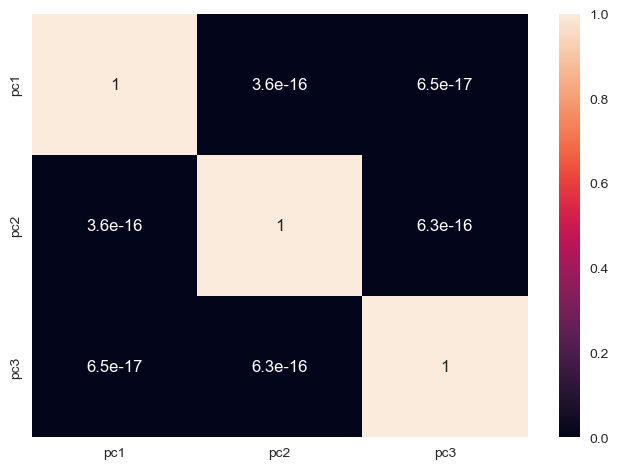

In [16]:
# Make An Heat Map For PC Data :
sns.heatmap(pc_data.corr(),annot=True);

### Step 6: Find the explained Variance Ratios 

In [17]:
evr_val1 = eig_val1/(np.sum(eig_val))
evr_val1

0.05790571365427058

In [18]:
evr_val2 = eig_val2/(np.sum(eig_val))
evr_val2

0.04031411906804149

In [19]:
evr_val3 = eig_val3/(np.sum(eig_val))
evr_val3

0.901780167277688

In [20]:
evr_val1+evr_val2+evr_val3

1.0

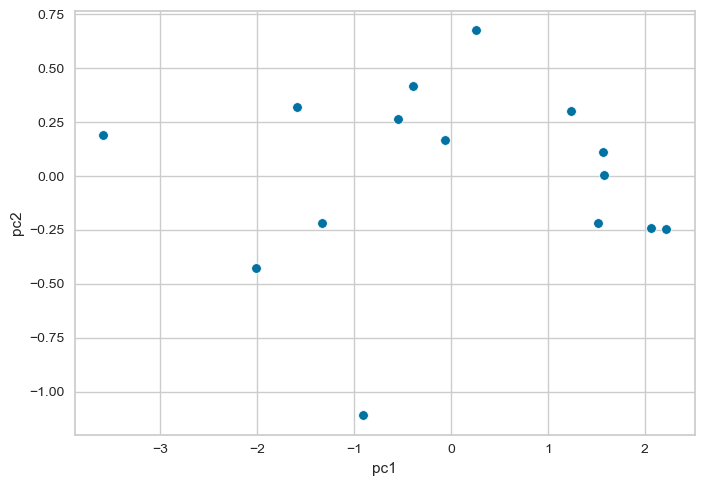

In [21]:
sns.scatterplot(x=pc_data["pc1"],y=pc_data["pc2"]);

### lets Apply PCA Function:

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=3)

In [24]:
pcs = pca.fit_transform(data_s)
pcs

array([[ 2.01534332,  0.42854947,  0.19290249],
       [-1.58090855, -0.00733457,  0.60003952],
       [ 1.33245768,  0.21652969, -0.23063468],
       [ 0.05770731, -0.16894766,  0.02956916],
       [-2.22095403,  0.2464896 , -0.15011962],
       [ 3.59229911, -0.18992155,  0.37461188],
       [-2.05786028,  0.24042868,  0.0224844 ],
       [-1.23722373, -0.30168841, -0.1794009 ],
       [ 0.90553959,  1.11102134, -0.09628478],
       [ 0.3903852 , -0.41963602,  0.00896248],
       [ 0.55018252, -0.26547537, -0.54472848],
       [-1.56926926, -0.11018104, -0.53949252],
       [-0.25346771, -0.67581845,  0.44042327],
       [ 1.59237251, -0.3219625 , -0.39635618],
       [-1.51660369,  0.2179468 ,  0.46802395]])

In [25]:
pcs = pd.DataFrame(pcs,columns=["pc1","pc2","pc3"])
pcs

,pc1,pc2,pc3
0,2.015343,0.428549,0.192902
1,-1.580909,-0.007335,0.600040
2,1.332458,0.216530,-0.230635
3,0.057707,-0.168948,0.029569
4,-2.220954,0.246490,-0.150120
5,3.592299,-0.189922,0.374612
6,-2.057860,0.240429,0.022484
7,-1.237224,-0.301688,-0.179401
8,0.905540,1.111021,-0.096285
9,0.390385,-0.419636,0.008962


## Eigen values and eigen vector :

In [26]:
pca.explained_variance_

array([2.89857911, 0.18612551, 0.1295811 ])

In [27]:
pca.components_

array([[-0.58317464,  0.57378162,  0.57504956],
       [ 0.04823714,  0.73109696, -0.68056625],
       [ 0.81091338,  0.36915023,  0.45403479]])

In [28]:
# Explained Variance Ratio:
pca.explained_variance_ratio_

array([0.90178017, 0.05790571, 0.04031412])

In [29]:
np.cumsum(pca.explained_variance_ratio_)

array([0.90178017, 0.95968588, 1.        ])

In [30]:
eig_val

array([2.89857911, 0.1295811 , 0.18612551])

## Lets Take Iris Dataset: 
### And Apply LDA (Linear Discriminant analysis)

In [31]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [32]:
le = LabelEncoder()
iris["species"] = le.fit_transform(iris["species"])
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [33]:
for i in iris.columns:
    if i !="species":
        sc = StandardScaler()
        iris[i] = sc.fit_transform(pd.DataFrame(iris[i]))
        

In [34]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
LDA = LinearDiscriminantAnalysis(solver="eigen")

In [37]:
lds = LDA.fit_transform(X=iris.iloc[:,:4],y=iris["species"])

In [38]:
lds = pd.DataFrame(lds,columns=["Ld1","Ld2"])

In [39]:
lds

,Ld1,Ld2
0,8.143648,0.303471
1,7.201062,-0.794647
2,7.565869,-0.268079
3,6.882372,-0.677440
4,8.214873,0.519686
...,...,...
145,-5.702315,1.694750
146,-5.232150,-0.367165
147,-5.018176,0.829477
148,-5.945905,2.368899


In [40]:
LDA.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [41]:
LDA.scalings_

array([[ 0.69143572,  0.02009348, -2.64442999, -0.25493982],
       [ 0.67335953,  0.94983812,  0.98873139, -0.63854513],
       [-3.91213972, -1.65627234,  4.30903908, -3.17779997],
       [-2.15676253,  2.17880821, -1.67074795,  3.07659459]])

# Thank You